In [4]:
import gensim.downloader as api
print("gensim.downloader.api imported.")

gensim.downloader.api imported.


In [5]:
word2vec_model = api.load('word2vec-google-news-300')
print("Word2Vec model 'word2vec-google-news-300' loaded successfully.")

[==================================================] 100.0% 1662.8/1662.8MB downloaded
Word2Vec model 'word2vec-google-news-300' loaded successfully.


In [6]:
if 'king' in word2vec_model.key_to_index:
    print("'king' is in the vocabulary. Finding similar words...")
    similar_words = word2vec_model.most_similar('king')
    print("Words similar to 'king':")
    for word, score in similar_words:
        print(f"  {word}: {score:.4f}")
else:
    print("'king' is out of vocabulary for this Word2Vec model.")

'king' is in the vocabulary. Finding similar words...
Words similar to 'king':
  kings: 0.7138
  queen: 0.6511
  monarch: 0.6413
  crown_prince: 0.6204
  prince: 0.6160
  sultan: 0.5865
  ruler: 0.5798
  princes: 0.5647
  Prince_Paras: 0.5433
  throne: 0.5422


In [7]:
positive_words = ['king', 'woman']
negative_words = ['man']

all_words_for_analogy = set(positive_words + negative_words)

missing_words = []
for word in all_words_for_analogy:
    if word not in word2vec_model.key_to_index:
        missing_words.append(word)

if not missing_words:
    print(f"Performing analogy: {' + '.join(positive_words)} - {' - '.join(negative_words)} = ?")
    try:
        analogy_results = word2vec_model.most_similar(positive=positive_words, negative=negative_words)
        for word, score in analogy_results:
            print(f"  {word}: {score:.4f}")
    except KeyError as e:
        print(f"An error occurred during analogy: {e}. One of the words might not be in the vocabulary, even after the initial check.")
else:
    print(f"Cannot perform analogy: The following words are missing from the vocabulary: {', '.join(missing_words)}")

Performing analogy: king + woman - man = ?
  queen: 0.7118
  monarch: 0.6190
  princess: 0.5902
  crown_prince: 0.5499
  prince: 0.5377
  kings: 0.5237
  Queen_Consort: 0.5236
  queens: 0.5181
  sultan: 0.5099
  monarchy: 0.5087


In [8]:
glove_model = api.load('glove-wiki-gigaword-50')
print("GloVe model 'glove-wiki-gigaword-50' loaded successfully.")

[==================================================] 100.0% 66.0/66.0MB downloaded
GloVe model 'glove-wiki-gigaword-50' loaded successfully.


In [9]:
if 'king' in glove_model.key_to_index:
    print("'king' is in the vocabulary. Finding similar words...")
    similar_words_glove = glove_model.most_similar('king')
    print("Words similar to 'king' (GloVe):")
    for word, score in similar_words_glove:
        print(f"  {word}: {score:.4f}")
else:
    print("'king' is out of vocabulary for this GloVe model.")

'king' is in the vocabulary. Finding similar words...
Words similar to 'king' (GloVe):
  prince: 0.8236
  queen: 0.7839
  ii: 0.7746
  emperor: 0.7736
  son: 0.7667
  uncle: 0.7627
  kingdom: 0.7542
  throne: 0.7540
  brother: 0.7492
  ruler: 0.7434


In [10]:
positive_words_glove = ['king', 'woman']
negative_words_glove = ['man']

all_words_for_analogy_glove = set(positive_words_glove + negative_words_glove)

missing_words_glove = []
for word in all_words_for_analogy_glove:
    if word not in glove_model.key_to_index:
        missing_words_glove.append(word)

if not missing_words_glove:
    print(f"Performing analogy (GloVe): {' + '.join(positive_words_glove)} - {' - '.join(negative_words_glove)} = ?")
    try:
        analogy_results_glove = glove_model.most_similar(positive=positive_words_glove, negative=negative_words_glove)
        for word, score in analogy_results_glove:
            print(f"  {word}: {score:.4f}")
    except KeyError as e:
        print(f"An error occurred during analogy: {e}. One of the words might not be in the vocabulary, even after the initial check.")
else:
    print(f"Cannot perform analogy (GloVe): The following words are missing from the vocabulary: {', '.join(missing_words_glove)}")

Performing analogy (GloVe): king + woman - man = ?
  queen: 0.8524
  throne: 0.7664
  prince: 0.7592
  daughter: 0.7474
  elizabeth: 0.7460
  princess: 0.7425
  kingdom: 0.7337
  monarch: 0.7214
  eldest: 0.7185
  widow: 0.7099


In [11]:
word2vec_vocab = set(word2vec_model.index_to_key)
glove_vocab = set(glove_model.index_to_key)

common_words = list(word2vec_vocab.intersection(glove_vocab))

# Select 20 words for visualization (or fewer if common_words has less than 20)
selected_words = common_words[:20]

if not selected_words:
    print("No common words found between the two models. Please check the models or their vocabularies.")
else:
    print(f"Selected {len(selected_words)} common words for visualization: {', '.join(selected_words)}")

Selected 20 common words for visualization: thous, diegetic, volunteerism, kips, furies, hydrostatic, graphical, tinting, externally, copyrighting, harsh, luncheons, spatula, grandma, lycee, clickstream, moonwalker, planters, temporizing, invent


In [12]:
word2vec_embeddings = []
glove_embeddings = []

for word in selected_words:
    word2vec_embeddings.append(word2vec_model[word])
    glove_embeddings.append(glove_model[word])

print(f"Extracted {len(word2vec_embeddings)} Word2Vec embeddings and {len(glove_embeddings)} GloVe embeddings for selected words.")

Extracted 20 Word2Vec embeddings and 20 GloVe embeddings for selected words.


In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

print("PCA and matplotlib.pyplot imported successfully.")

PCA and matplotlib.pyplot imported successfully.


In [14]:
pca_word2vec = PCA(n_components=2)
pca_glove = PCA(n_components=2)

# Convert lists of arrays to numpy arrays for PCA
word2vec_embeddings_array = np.array(word2vec_embeddings)
glove_embeddings_array = np.array(glove_embeddings)

word2vec_2d = pca_word2vec.fit_transform(word2vec_embeddings_array)
glove_2d = pca_glove.fit_transform(glove_embeddings_array)

print("Word2Vec embeddings reduced to 2D shape:", word2vec_2d.shape)
print("GloVe embeddings reduced to 2D shape:", glove_2d.shape)

Word2Vec embeddings reduced to 2D shape: (20, 2)
GloVe embeddings reduced to 2D shape: (20, 2)


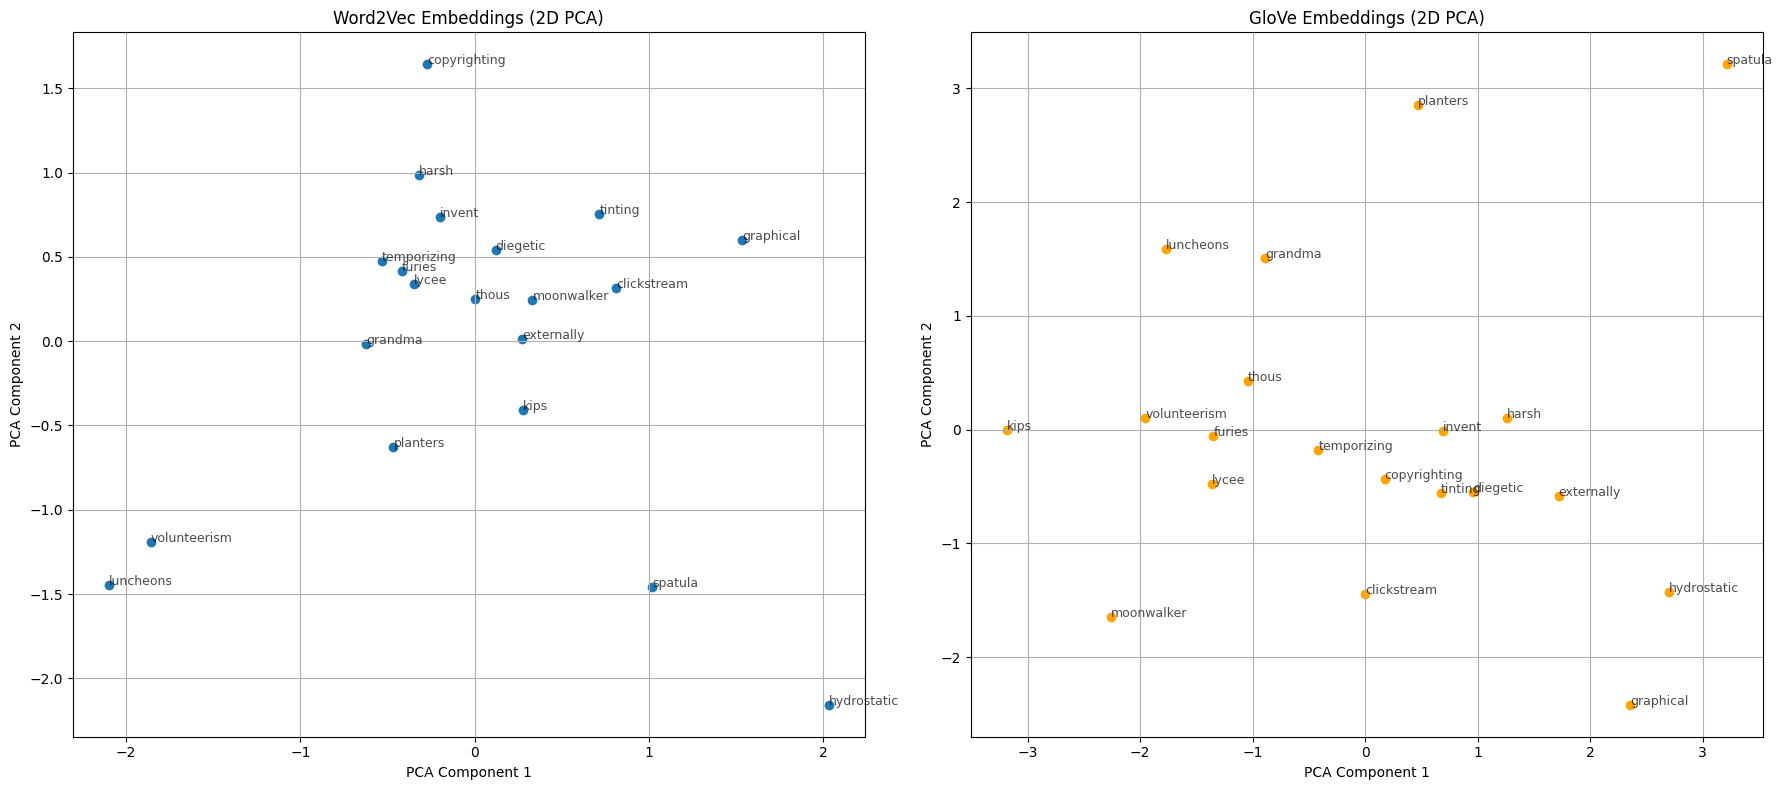

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot Word2Vec Embeddings
axes[0].scatter(word2vec_2d[:, 0], word2vec_2d[:, 1])
for i, word in enumerate(selected_words):
    axes[0].annotate(word, (word2vec_2d[i, 0], word2vec_2d[i, 1]), fontsize=9, alpha=0.7)
axes[0].set_title('Word2Vec Embeddings (2D PCA)')
axes[0].set_xlabel('PCA Component 1')
axes[0].set_ylabel('PCA Component 2')
axes[0].grid(True)

# Plot GloVe Embeddings
axes[1].scatter(glove_2d[:, 0], glove_2d[:, 1], color='orange')
for i, word in enumerate(selected_words):
    axes[1].annotate(word, (glove_2d[i, 0], glove_2d[i, 1]), fontsize=9, alpha=0.7)
axes[1].set_title('GloVe Embeddings (2D PCA)')
axes[1].set_xlabel('PCA Component 1')
axes[1].set_ylabel('PCA Component 2')
axes[1].grid(True)

plt.tight_layout()
plt.show()
